IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

LOAD THE DATASET

In [2]:
data = pd.read_csv('/content/Customer-Churn-Records.csv')

REPRESENT THE FIRST AND LAST FIFTH ROWS OF DATA

In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


REPRESENT ONLY THE FIRST FIFTH ROWS OF THE DATASET

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


CHECKING FOR THE MISSING VALUES OR ANY INCONSISTENCY

In [7]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

CHECKING FOR THE MISSING VALUES LIES IN FORM OF NA

In [9]:
missing_value= ["NA","N/A"]
data = pd.read_csv('/content/Customer-Churn-Records.csv',na_values=missing_value)


In [10]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

DETECT FOR OUTLIERS

In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


AS YOU CAN SEE WE FIND OUTLIER IN THE NUM OF PRODUCTS COLUMN AFTER TREATING EVERY COLUMN WITH BOXPLOT

<Axes: ylabel='NumOfProducts'>

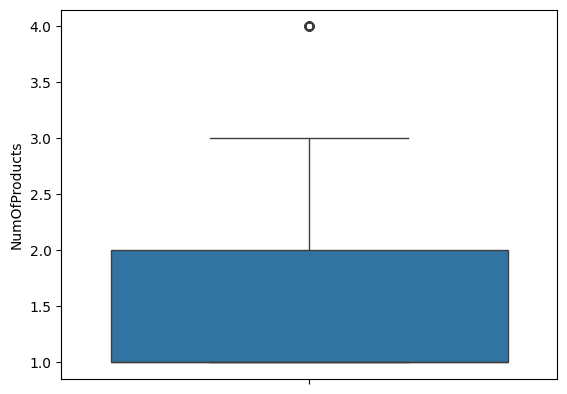

In [29]:
sns.boxplot(data['NumOfProducts'])

TREAT THE OUTLIER

In [32]:
upper_limit = data['NumOfProducts'].mean() +3*data['NumOfProducts'].std()
lower_limit = data['NumOfProducts'].mean() -3*data['NumOfProducts'].std()
print('upper limit' , upper_limit)
print('lower limit' , lower_limit)

upper limit 3.2751630739969717
lower limit -0.2147630739969717


THESE ARE THE OUTLIERS IN OUR DATA

In [33]:
data.loc[(data['NumOfProducts']> upper_limit)| (data['NumOfProducts']< lower_limit)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
70,71,15703793,Konovalova,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1,1,4,GOLD,725
1254,1255,15610383,Dumetolisa,628,France,Female,46,1,46870.43,4,1,0,31272.14,1,1,1,DIAMOND,826
1469,1470,15670374,Wright,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1,1,3,PLATINUM,991
1488,1489,15625824,Kornilova,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1,1,2,SILVER,317
1701,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,1,4,DIAMOND,369
1876,1877,15664754,Steele,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1,1,2,GOLD,436
2124,2125,15603851,Galkin,704,France,Male,32,7,127785.17,4,0,0,184464.70,1,1,1,PLATINUM,981
2196,2197,15791700,Ugochukwutubelum,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1,1,4,PLATINUM,668
2285,2286,15783615,Ramos,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1,1,1,GOLD,712


SOLUTION

TRIM THE DATA

In [38]:
new_data =data.loc[(data['NumOfProducts']< upper_limit)& (data['NumOfProducts'] > lower_limit)]
print('before outliers: ', len(data))
print('after outliers: ', len(new_data))
print('outliers: ', len(data)-len(new_data))


before outliers:  10000
after outliers:  9940
outliers:  60


Hence all the outliers are removed

CHECK FOR THE DUPLICATED VALUES

In [45]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [46]:
data.duplicated('CustomerId')

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

HENCE THE DATA IS CLEANED